<a href="https://colab.research.google.com/github/PapaZeusOne/Systematic-Mapping-Study/blob/main/Intelligente_Systeme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gather all relevant packages**

In [1]:
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import spacy
from pyate.term_extraction_pipeline import TermExtractionPipeline
from csv import writer

# **Clustering top 30 areas**

In [44]:
path = 'clustering - areas.csv'

df = pd.read_csv(path, sep=';', encoding='unicode_escape')

In [45]:
df['area'] = df['area'].str.lower()
df['area'] = df.apply(lambda x: x.str.strip())
df

,area
0,software engineering process
1,challenges
2,challenges
3,challenges
4,software engineering process
5,software engineering process
6,software engineering process
7,challenges
8,software engineering process
9,challenges


In [50]:
counter = df.groupby(['area']).size().reset_index()
counter.rename(columns = {0:'counter'}, inplace = True)
counter

,area,counter
0,challenges,9
1,software construction,1
2,software design,2
3,software engineering management,1
4,software engineering process,11
5,software testing,6


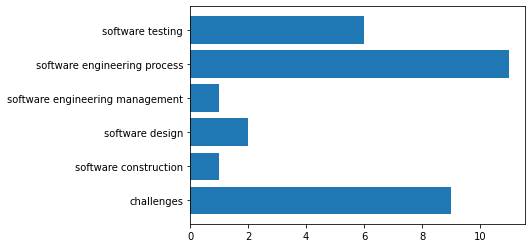

In [60]:
fig = plt.figure()
ax = plt.axes()

ax.barh(counter.area, counter.counter, label='Number of references')
plt.show()

In [61]:
fig.savefig("topics covered.png")

# **Grouping keywords generated with spaCy**

In [18]:
path = 'Keyword - Grouping.csv'

df = pd.read_csv(path, sep=';', encoding='unicode_escape')
df

,keyword1,keyword2,keyword3,keyword4,keyword5,score
0,",""software",engineering,NaN,NaN,NaN,"3,636294"
1,essential,engineering,NaN,NaN,NaN,"2,943147"
2,software,application,NaN,NaN,NaN,"2,943147"
3,engineering,challenges,NaN,NaN,NaN,"2,193147"
4,engineering,processes,NaN,NaN,NaN,"2,193147"
...,...,...,...,...,...,...
954,Recent,Discussions,NaN,NaN,NaN,"0,693147"
955,first,time,NaN,NaN,NaN,"0,693147"
956,research,projects,NaN,NaN,NaN,"1,443147"
957,expert,systems,NaN,NaN,NaN,"4,329442"


In [19]:
#df.dropna(inplace=True)
df['score'] = df['score'].str.replace(",", ".")
df['keyword1'] = df['keyword1'].str.replace(',"', "")
df['keyword1'] = df['keyword1'].str.replace("dtype:", "")
df['keyword2'] = df['keyword2'].str.replace('float64"', "")

In [20]:
df['keyword'] = df[['keyword1', 'keyword2', 'keyword3', 'keyword4', 'keyword5']].fillna('').agg(' '.join, axis=1)
df['keyword'] = df['keyword'].str.lower()

df = df.dropna(subset=['score'])
df = df.drop(columns=['keyword1', 'keyword2', 'keyword3', 'keyword4', 'keyword5'])

df['score'] = df['score'].apply(lambda x: float(x))
df

,score,keyword
0,3.636294,software engineering
1,2.943147,essential engineering
2,2.943147,software application
3,2.193147,engineering challenges
4,2.193147,engineering processes
...,...,...
954,0.693147,recent discussions
955,0.693147,first time
956,1.443147,research projects
957,4.329442,expert systems


In [16]:
counter = df.groupby(['keyword']).agg('count').reset_index()
counter.rename(columns = {'score':'counter'}, inplace = True)
counter

,keyword,counter
0,50th anniversary,1
1,absolute peak,1
2,acceptable safety,1
3,accuracy model,1
4,activity levels,1
...,...,...
467,user interface,1
468,value generation,3
469,wider computer,1
470,wider computer science,1


In [ ]:
grouped = df.groupby(['keyword']).mean().reset_index()
grouped

,keyword,score
0,50th anniversary,0.693147
1,absolute peak,0.693147
2,acceptable safety,1.443147
3,accuracy model,1.443147
4,activity levels,1.443147
...,...,...
467,user interface,0.693147
468,value generation,1.443147
469,wider computer,2.193147
470,wider computer science,2.048612


In [ ]:
df_scatter = grouped.join(counter['counter'])

In [ ]:
print(len(df_scatter['counter']))

472


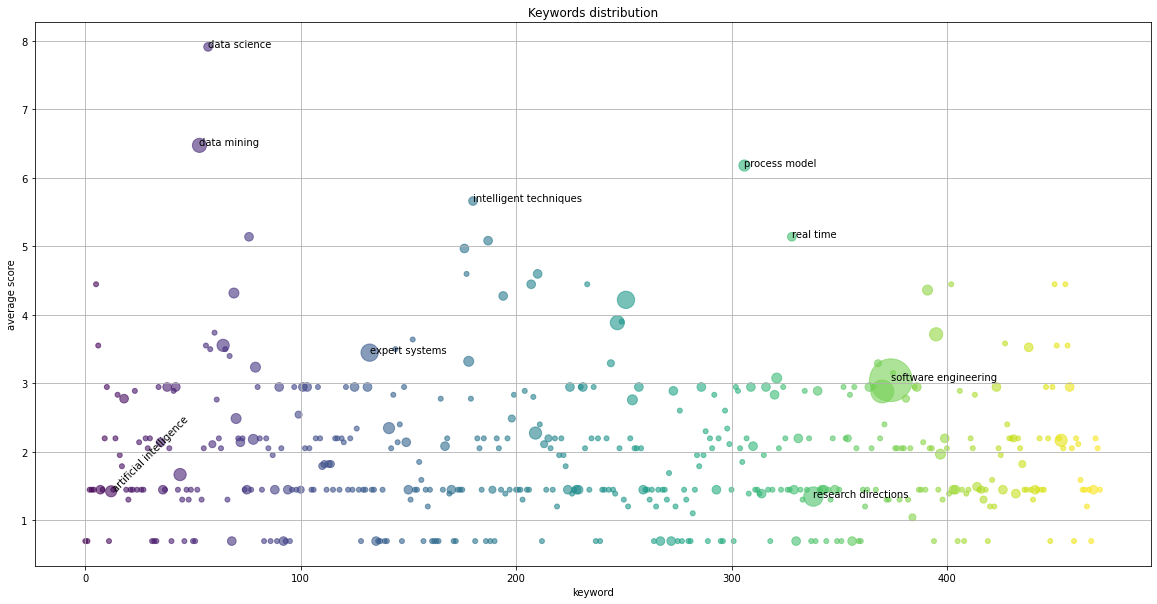

In [ ]:
figure = plt.figure(figsize=(20,10))
axes = plt.axes()
colors = np.arange(472)

size = [5*2**n for n in df_scatter['counter'].tolist()]

axes.scatter(df_scatter.index,
             df_scatter['score'],
             s=df_scatter['counter']*25,
             c=colors,
             cmap='viridis',
             alpha=0.6,
             picker=True)

plt.annotate('data science', (57, 7.908883))
plt.annotate('software engineering', (374, 3.042111))
plt.annotate('process model', (306, 6.177106))
plt.annotate('expert systems', (132, 3.444966))
plt.annotate('research directions', (338, 1.343147))
plt.annotate('real time', (328, 5.136294))
plt.annotate('intelligent techniques', (180, 5.658883))
plt.annotate('data mining', (53, 6.471478))
plt.annotate('artificial intelligence', (12, 1.420406), rotation=45)

# https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5



axes.set(xlabel='keyword', ylabel='average score',
       title='Keywords distribution')

axes.grid()

In [ ]:
figure.savefig("Keywords distribution.png")

In [ ]:

fig = go.Figure(data=[go.Scatter(
    x=df_scatter.index, y=df_scatter['score'],
    mode='markers',
    text='keyword: ' + df_scatter['keyword'],
    opacity=0.6,
    textposition='top center',
    marker=dict(
        color=df_scatter.index,
        size=df_scatter['counter'],
        sizemode='area',
        sizeref=2.*max(df_scatter['counter'])/(35.**2),
        sizemin=4
    ))
])

fig.update_layout(
    title="Keywords distribuation",
    xaxis_title="keyword",
    yaxis_title="average score",
)


fig.show()

# **Group literature publications considering SE for AI**

In [ ]:
path = 'Our Collection - Publications.csv'

data = pd.read_csv(path, sep=';', encoding='unicode_escape')
data['number of cited by'] = data['number of cited by'].apply(lambda x: float(x))

FileNotFoundError: ignored

In [ ]:
df_year = pd.DataFrame(index=data['year'])
df_year.dropna(inplace=True)

In [ ]:
cited_by = data.groupby(['year']).mean().reset_index()

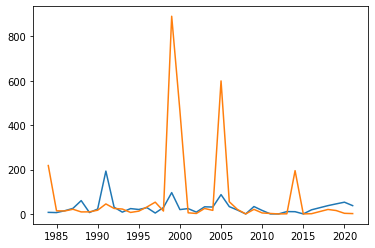

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.plot(cited_by.year, cited_by['number of ref'], label='Number of references')
ax.plot(cited_by.year, cited_by['number of cited by'], label='Number of Cited By references')

In [ ]:
group_year = data['year'].groupby(data.year).agg('count')
df_year = pd.DataFrame(data=group_year)
df_year.rename(columns = {'year':'number'}, inplace = True)

In [ ]:
df_year['average'] = df_year['number'].rolling(window=3).mean()

In [ ]:
df_year

,number,average
year,,
1984,2,NaN
1985,1,NaN
1986,3,2.000000
1987,3,2.333333
1988,1,2.333333
1989,3,2.333333
1990,3,2.333333
1991,1,2.333333
1992,4,2.666667


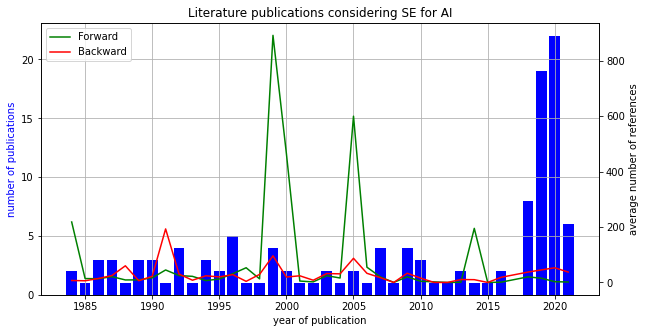

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

ax1.bar(df_year.index, df_year.number, label='Number of publications', color='b')
#ax1.plot(df_year.index, df_year.average, label='Average number of publications')
ax2.plot(cited_by.year, cited_by['number of cited by'], label='Forward', color='g')
ax2.plot(cited_by.year, cited_by['number of ref'], label='Backward', color='r')
ax1.set(title='Literature publications considering SE for AI')

ax1.set_xlabel('year of publication')
ax1.set_ylabel('number of publications', color='b')
ax2.set_ylabel('average number of references')

# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

ax2.legend(loc='upper left')
ax1.grid()

In [ ]:
fig.savefig("Number of publications.png")

In [ ]:
final_data.to_csv('Master Collection.csv', index=False, sep=';', encoding='utf-8')

# **spaCy script to generate keywords**

In [ ]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe(TermExtractionPipeline())
data=pd.read_csv("Our Publications.csv",delimiter=';')
finaldata=pd.DataFrame([['Test',2],['test',2]],columns=list('AB'))

In [ ]:
for index,row in data.iterrows():
    string = row['abstract']
    doc = nlp(string)
    print(row['title'])
    print(doc._.combo_basic.sort_values(ascending=False).head(5))
    with open('Testzwecke.csv','a+',newline='')as csvfile:
        csv_writer=writer(csvfile)
        csv_writer.writerow([row['title'],doc._.combo_basic.sort_values(ascending=False).head(5)])

# **Use this code to convert .bib into .csv and drop duplicates**

In [ ]:
pip install bibtexparser

In [ ]:
# Change .bib and .csv for your case
# Method used to transform bib to csv

import bibtexparser

with open('My Collection.bib') as bibtex_file:
  bib_database = bibtexparser.load(bibtex_file)
df = pd.DataFrame(bib_database.entries)
df.to_csv('My Collection.csv', index=False, sep=';', encoding='utf-8')

In [ ]:
# Clean .csv by deleting dublicates and unnecessary strings

data['title'] = data['title'].str.replace("{", "")
data['title'] = data['title'].str.replace("}", "")

data['doi'] = data['doi'].str.replace("https://doi.org/", "")
data['doi'] = data['doi'].str.replace("https://citeseerx.ist.psu.edu/viewdoc/download?", "")
data['doi'] = data['doi'].str.replace("https://arxiv.org/abs/", "")
data['doi'] = data['doi'].str.replace("https://apps.dtic.mil/sti/citations/", "")

data['NR.'] = pd.to_numeric(data['NR.'], downcast='integer')
final_data = data.drop_duplicates(subset=['title'])
final_data = data.drop_duplicates(subset=['doi'])